# 6.4 part 2
### ***Number_of_ingredients (X), Rating (y)***
   

# Contents
    1. Import libraries and data
    2. Data cleaning
    3. Hypothesis
    4. Data prep for regression analysis 
    5. Regression analysis
    6. Summary
   

# 1. Import Libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# creating path for import
path = r'/Users/bdigregorio/Desktop/CareerFoundry/Data Immersion/Data Immersion 6/Flavors of Cacao Analysis'


In [9]:
# importing 'df_fc3_B'

df_fc3_B = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'df_fc3_B.xlsx'))


# 2. Data cleaning


In [10]:
df_fc3_B.head()

,Unnamed: 0,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Cocoa Level,Number_of_Ingredients,Ingredient Level,Rating,Rating Level,Ingredients_abbr,Most Memorable Characteristics
0,0,Manoa,U.S.A.,2012,Liberia,"Liberia, batch 174",0.72,Mid percent,3,3,3.25,Mid-level,"B,S,C","molassses, intense, off, herb"
1,1,Manoa,U.S.A.,2012,U.S.A.,"Hawai'i Island, Hamakua, Hawaiian Crown, b. 176",0.72,Mid percent,3,3,2.75,Mid-level,"B,S,C","oily, tangy, fruit, earthy"
2,2,Manoa,U.S.A.,2012,Peru,"Piura, batch 173",0.72,Mid percent,3,3,3.00,Mid-level,"B,S,C","banana, menthol, medicinal"
3,3,Manoa,U.S.A.,2012,U.S.A.,"O'ahu Island, Winward,Maunawili district, b. 151",0.72,Mid percent,3,3,3.25,Mid-level,"B,S,C","molasses, sweet, cocoa"
4,4,Nanea,U.S.A.,2013,U.S.A.,Criollo Blend,0.85,High percent,3,3,3.50,Mid-level,NaN,"sandy, spicy, earthy"


In [12]:
df_fc3_B.shape

(2657, 14)

In [13]:
df_fc3_B.drop(columns = ['Unnamed: 0'],inplace=True)

In [14]:
# check column drop
df_fc3_B.head()

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Cocoa Level,Number_of_Ingredients,Ingredient Level,Rating,Rating Level,Ingredients_abbr,Most Memorable Characteristics
0,Manoa,U.S.A.,2012,Liberia,"Liberia, batch 174",0.72,Mid percent,3,3,3.25,Mid-level,"B,S,C","molassses, intense, off, herb"
1,Manoa,U.S.A.,2012,U.S.A.,"Hawai'i Island, Hamakua, Hawaiian Crown, b. 176",0.72,Mid percent,3,3,2.75,Mid-level,"B,S,C","oily, tangy, fruit, earthy"
2,Manoa,U.S.A.,2012,Peru,"Piura, batch 173",0.72,Mid percent,3,3,3.00,Mid-level,"B,S,C","banana, menthol, medicinal"
3,Manoa,U.S.A.,2012,U.S.A.,"O'ahu Island, Winward,Maunawili district, b. 151",0.72,Mid percent,3,3,3.25,Mid-level,"B,S,C","molasses, sweet, cocoa"
4,Nanea,U.S.A.,2013,U.S.A.,Criollo Blend,0.85,High percent,3,3,3.50,Mid-level,NaN,"sandy, spicy, earthy"


In [15]:
# check for duplicates again
dups = df_fc3_B.duplicated()

In [16]:
dups.shape

(2657,)

### No duplicates

### Extreme values check

/var/folders/sy/t8rtd3yx6xg83r29mvqjg7cm0000gp/T/ipykernel_95829/433515840.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_fc3_B['Number_of_Ingredients'], bins=25)


<Axes: xlabel='Number_of_Ingredients', ylabel='Density'>

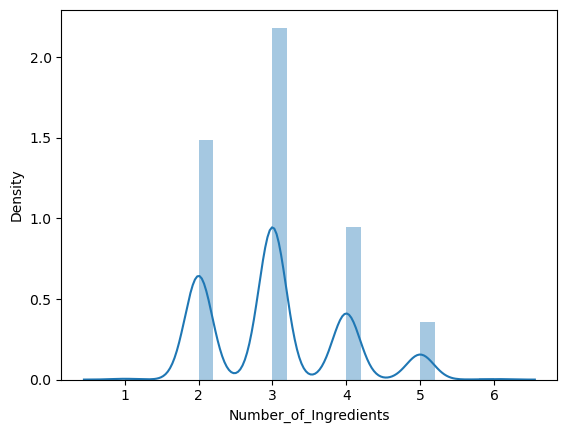

In [18]:
sns.distplot(df_fc3_B['Number_of_Ingredients'], bins=25)

### Most chocolate bars are made with three ingredients

In [19]:
# summary stats
df_fc3_B['Number_of_Ingredients'].agg(['mean','min', 'median', 'max',])

mean      3.035755
min       1.000000
median    3.000000
max       6.000000
Name: Number_of_Ingredients, dtype: float64

In [20]:
# Creating how to see Rating mode values of 'Number_of_Ingredients'
# Custom function to calculate the mode
def mode(group):
    return group.mode().iloc[0]  

In [21]:
# summary stats
df_fc3_B['Number_of_Ingredients'].agg(['mean','min', 'median', 'max',mode])


mean      3.035755
min       1.000000
median    3.000000
max       6.000000
mode      3.000000
Name: Number_of_Ingredients, dtype: float64

# 3. HYPOTHESIS

## An earlier hypothesis will be looked into now. It is:
## Chocolate bars with the highest rating have a mid-level amount of cocoa.
***(1= "Completely Cocoa"), (>=0.75 and <1: "High percent"), (>= 0.6 and < 0.75: "Mid percent), ("<0.6: "Low percent")***

# 4. Data prep for regression analysis 

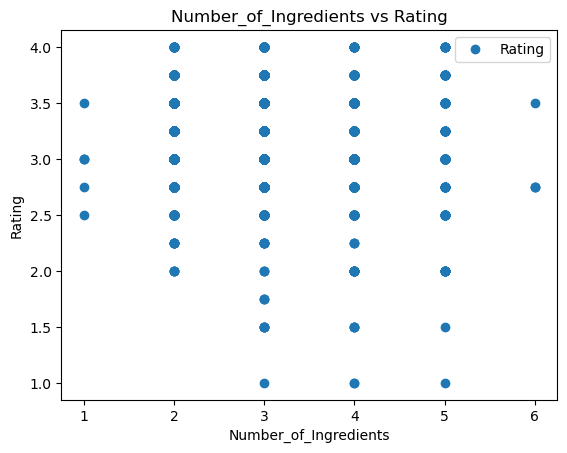

In [22]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# Trying to understand how the cocoa level (independent variable) relates to the rating (dependent variable)
df_fc3_B.plot(x = 'Number_of_Ingredients', y='Rating',style='o') 
plt.title('Number_of_Ingredients vs Rating')  
plt.xlabel('Number_of_Ingredients')  
plt.ylabel('Rating')
plt.show()

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_fc3_B['Number_of_Ingredients'].values.reshape(-1,1)
y = df_fc3_B['Rating'].values.reshape(-1,1)

In [24]:
X

array([[3],
       [3],
       [3],
       ...,
       [2],
       [2],
       [2]])

In [25]:
y

array([[3.25],
       [2.75],
       [3.  ],
       ...,
       [2.75],
       [2.5 ],
       [2.5 ]])

In [26]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 5. Regression analysis

In [27]:
# Creating a regression object.
# This is the regression object, which will be fit onto the training set.

regression = LinearRegression()  

In [28]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

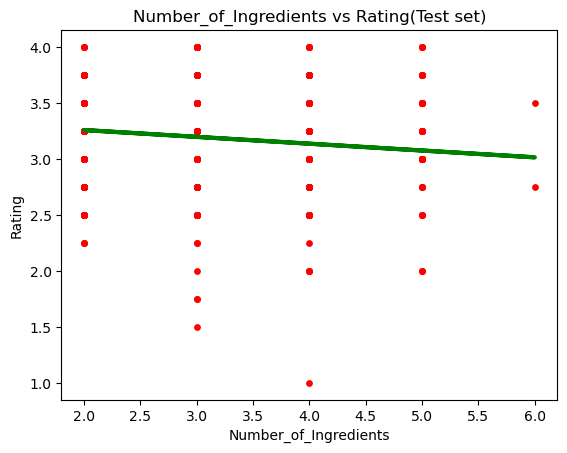

In [30]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='red', s = 15)
plot_test.plot(X_test, y_predicted, color='green', linewidth =3)
plot_test.title('Number_of_Ingredients vs Rating(Test set)')
plot_test.xlabel('Number_of_Ingredients')
plot_test.ylabel('Rating')
plot_test.show()

In [31]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [32]:
# Print the model summary statistics. 
# Evaluating the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.06094848]]
Mean squared error:  0.18191711013334652
R2 score:  -0.008343358268172896


### Negative slope indicates a negative relationship: as "Number_of_Ingredients" (X) rises, "Rating" (y) falls.                                                                                              
### MSE: not a large number. Prediction may be close to the actual results but R2 score is very small (close to zero!) but negative number (-0.0083):  may not be a very good model fit.

In [33]:
y_predicted

array([[3.19567246],
       [3.13472397],
       [3.19567246],
       [3.19567246],
       [3.19567246],
       [3.19567246],
       [3.19567246],
       [3.25662094],
       [3.19567246],
       [3.13472397],
       [3.19567246],
       [3.07377549],
       [3.25662094],
       [3.25662094],
       [3.19567246],
       [3.25662094],
       [3.13472397],
       [3.25662094],
       [3.19567246],
       [3.13472397],
       [3.19567246],
       [3.07377549],
       [3.19567246],
       [3.25662094],
       [3.25662094],
       [3.07377549],
       [3.13472397],
       [3.19567246],
       [3.19567246],
       [3.13472397],
       [3.13472397],
       [3.19567246],
       [3.19567246],
       [3.13472397],
       [3.19567246],
       [3.19567246],
       [3.19567246],
       [3.19567246],
       [3.19567246],
       [3.19567246],
       [3.25662094],
       [3.19567246],
       [3.19567246],
       [3.19567246],
       [3.19567246],
       [3.25662094],
       [3.13472397],
       [3.134

In [46]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(25)

,Actual,Predicted
0,4.00,3.195672
1,3.00,3.134724
2,3.75,3.195672
3,3.75,3.195672
4,2.50,3.195672
5,3.25,3.195672
6,3.75,3.195672
7,3.50,3.256621
8,3.25,3.195672
9,3.00,3.134724


### Not very good preditions: many preditions are off by as much as half of a rating point.

### Comparing how the regression fits the training set

In [47]:
# Predicting the X_train

y_predicted_train = regression.predict(X_train)

In [48]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [49]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.06094848]]
Mean squared error:  0.1983027083548577
R2 score:  0.014853429466764934


### Slope has not changed.
### MSE decreased by approx. 0.0164
### R2 score decreased by approx. 0.0231. The training set actually performed better than the test set but R2 score being much closer to zero than one indicates not a good fit here either.

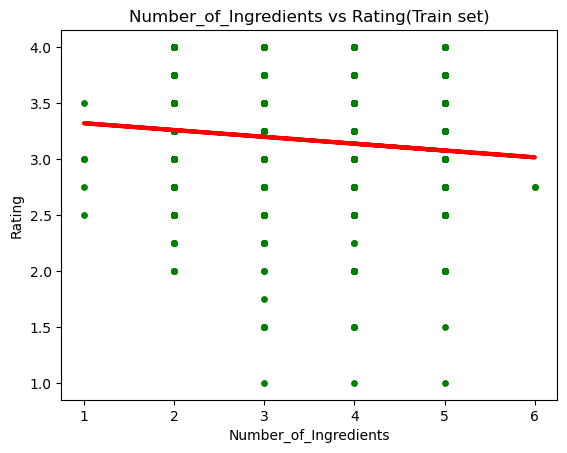

In [50]:
# scatterplot the training set.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number_of_Ingredients vs Rating(Train set)')
plot_test.xlabel('Number_of_Ingredients')
plot_test.ylabel('Rating')
plot_test.show()

In [51]:
data = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted_train.flatten()})
data.head(25)

,Actual,Predicted
0,2.50,3.073775
1,3.00,3.256621
2,3.00,3.195672
3,3.50,3.195672
4,3.00,3.256621
5,3.00,3.195672
6,3.00,3.195672
7,3.00,3.195672
8,3.50,3.256621
9,2.50,3.134724


### These are fairly wide discrepancies but appear to be the norm.


# 6. Summary

## As in part 1, we  have to consider the bias for any project. As stated earlier, the rating of chocolate bars is a subjective tasting. 
## Previous analyses have shown most favorably tasting bars (high ratings) have mid-level number of ingredients. The charts mostly show us as more ingredients go into the chocolate bars the ratings go down, but the above model does not appear to be a very good predictor of actual results of the number of ingredients and subsequent ratings. 